# Naive Bayes

## Teoría: Teorema de Bayes

Describe la probabilidad de un evento, basada en el conocimiento previo de las condiciones que podrían estar relacionadas con el evento. Usando el teorema de Bayes, podemos encontrar la probabilidad de que ocurra \\(y \\), dado que ha ocurrido \\(x \\). Aquí, \\(x \\) es la evidencia, \\(y \\) es el conocimiento previo y \\(P (x | y) \\) es la probabilidad. La suposición que se hace aquí es que los predictores / características son independientes.

Su ecuación es la siguiente:

\\(P (y | x) = \dfrac {P (x | y) P (y)} {P (x)}\\)
dónde
* \\(y, x \\) = Eventos
* \\(P (y | x) \\) = Probabilidad de \\(y \\) dado \\(x \\)
* \\(P (x | y) \\) = Probabilidad de \\(x \\) dado \\(y \\)
* \\(P (y), P (x) \\) = Probabilidades independientes de \\(y \\) y \\(x \\)

Los métodos de Naive Bayes son un conjunto de algoritmos de aprendizaje supervisado basados en la aplicación del teorema de Bayes con el supuesto "ingenuo" de independencia condicional entre cada par de características dado el valor de la variable de clase.

En nuestro caso, utilizaremos el dataset de titanic, donde la variable \\(y \\) es la variable de clase (Supervivencia 0 o 1), que representa si un pasajero sobrevivirá o no dadas las condiciones. La variable \\(X \\) representa los parámetros / características. \\(X \\) se da como \\(X = (x_ {1}, x_ {2}, ..., x_ {n}) \\) y se pueden asignar a Edad, Clase, Sexo, etc. Sustituyendo \\ (X \\) en la regla de Bayes y expandiendo usando la regla de la cadena obtenemos
        
\\(P (y | x_ {1}, x_ {2}, ..., x_ {n}) = \dfrac {P (x_ {1} | y) P (x_ {2} | y) .. .P (x_ {n} | y) P (y)} {P (x_ {1}) P (x_ {2}) ... P (x_ {n})} \\)

Ahora, puede calcular los valores para cada probabilidad mirando el conjunto de datos y sustituirlos en la ecuación. En nuestro caso, la variable de clase \\(y \\) tiene dos resultados: 0 o 1. Por lo tanto, las probabilidades de supervivencia para cada caso '*Supervivencia*' o '*No supervivencia*' (1 o 0, respectivamente) deben calcularse para cada pasajero. El que tiene la mayor probabilidad es el resultado final. Es decir, si \\(P (1)> P (0) \\), la persona sobrevivirá.

## Implementación

In [50]:
import pandas as pd
import seaborn as sns


df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
for i in df_train:
    print('valores nulos {0}: {1}'.format(i,df_train.shape[0]-df_train.count()[i]))

valores nulos PassengerId: 0
valores nulos Survived: 0
valores nulos Pclass: 0
valores nulos Name: 0
valores nulos Sex: 0
valores nulos Age: 177
valores nulos SibSp: 0
valores nulos Parch: 0
valores nulos Ticket: 0
valores nulos Fare: 0
valores nulos Cabin: 687
valores nulos Embarked: 2


Para simplificar, utilizaremos solo 3 variables: clase, sexo y edad

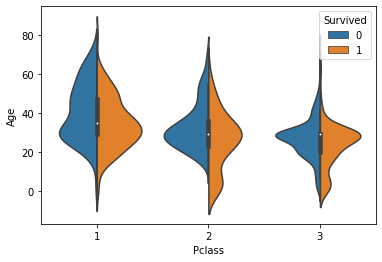

In [51]:
sexos={"male":0, "female":1}
df_train.Sex=[sexos[item] for item in df_train.Sex]
df_test.Sex=[sexos[item] for item in df_test.Sex]

df_train.Age.fillna(df_train.Age.mean(), inplace=True)
df_test.Age.fillna(df_test.Age.mean(), inplace=True)

df_train.Age=df_train.Age.astype(int)
df_test.Age=df_test.Age.astype(int)

#A wild plot has appeared, just for the heck of it
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, split=True)

#Ages grouped
data = [df_train, df_test]
for dataset in data:
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

## La construcción del modelo de aprendizaje automático comienza aquí:

Tenemos 3 características, por lo que la regla de Bayes toma la siguiente forma,

\\( P(y|x_{1}, x_{2},x_{3})= \dfrac{P(x_{1}|y)P(x_{2}|y)P(x_{3}|y)P(y)}{P(x_{1})P(x_{2})P(x_{3})} \\)

donde

\\( P(y) \\) = Probabilidad de supervivencia (para 0 y para 1), por lo que es una matriz bidimensional.
* \\( P(x_{1}) \\) = Probabilidad de Pclass, es una matriz tridimensional (indicada como p_Class en el código)
* \\( P(x_{2}) \\) = Probabilidad de género, matriz bidimensional (indicada como p_Sex en el código)
* \\( P(x_{3}) \\) = Probabilidad de edad, matriz de 8 dimensiones (indicada como p_Age en el código)

y las probabilidades condicionales

*  \\( P(x_{1}|y) \\) = Probabilidad de supervivencia de Pclass (0 or 1)
*  \\( P(x_{2}|y) \\) = Probabilidad de género dada la supervivencia (0 or 1)
*  \\( P(x_{3}|y) \\) =  Probabilidad de supervivencia dada la edad (0 or 1)

The probabilities are calculated below:

In [62]:
#probabilities of the features
    
Class_counts=df_train['Pclass'].value_counts()
p_Class=Class_counts/len(df_train)

Sex_counts=df_train['Sex'].value_counts()
p_Sex=Sex_counts/len(df_train)

Age_counts=df_train['Age'].value_counts()
p_Age=Age_counts/len(df_train)

# Survival and Death probabilities
y_counts=df_train['Survived'].value_counts()
p_y=y_counts/len(df_train)

df_survived=df_train.loc[df_train['Survived'] == 1]
df_died=df_train.loc[df_train['Survived'] == 0]

# Conditional probabilities
#class/survived
class_survived_counts=df_survived['Pclass'].value_counts()  
p_class_survived=class_survived_counts/len(df_survived)

# class/died
class_died_counts=df_died['Pclass'].value_counts()  
p_class_died=class_died_counts/len(df_died)

#sex/survived
sex_survived_counts=df_survived['Sex'].value_counts()  
p_sex_survived=sex_survived_counts/len(df_survived)

sex_died_counts=df_died['Sex'].value_counts()  
p_sex_died=sex_died_counts/len(df_died)

#Age/survived
age_survived_counts=df_survived['Age'].value_counts()  
p_age_survived=age_survived_counts/len(df_survived)

age_died_counts=df_died['Age'].value_counts()  
p_age_died=age_died_counts/len(df_died)

Bayes function defined below:

In [63]:
def Bayes(py, px1y, px2y, px3y, px1, px2, px3):
    numerator=px1y*px2y*px3y*py
    denominator=px1*px2*px3
    p=numerator/denominator
    return p

Las probabilidades de supervivencia de cada pasajero se calculan a continuación:

In [64]:
result_array=[]

for i in range(0,418):
    feature_class=df_test.iloc[i]['Pclass']
    feature_sex=df_test.iloc[i]['Sex']
    feature_age=df_test.iloc[i]['Age']
    
    P_Y1=Bayes(p_y[1], p_class_survived[feature_class], p_sex_survived[feature_sex], p_age_survived[feature_age], p_Class[feature_class], p_Sex[feature_sex], p_Age[feature_age])
    P_Y0=Bayes(p_y[0], p_class_died[feature_class], p_sex_died[feature_sex], p_age_died[feature_age], p_Class[feature_class], p_Sex[feature_sex], p_Age[feature_age])
    
    if P_Y0 > P_Y1:
        result=0
    else:
        result=1
        
    result_array.append(result)


output = pd.DataFrame({'PassengerId': df_test.PassengerId,'Survived': result_array})

In [65]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Usemos scikit-learn

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [75]:
X = df_train[["Pclass", "Age", "Sex"]].dropna(axis=0, how='any')
y = df_train["Survived"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)

In [77]:
gnb = GaussianNB()

In [78]:
gnb.fit(X_train, y_train)

GaussianNB()

In [79]:
y_pred = gnb.predict(X_test)

In [80]:
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (y_test != y_pred).sum(),
          100*(1-(y_test != y_pred).sum()/X_test.shape[0])
))

Number of mislabeled points out of a total 446 points : 99, performance 77.80%
